## The data 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

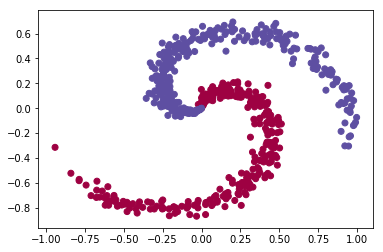

In [2]:
from scratchnet.datasets import make_spiral

X, y = make_spiral(n_samples=600, n_features=2, n_classes=2)

plt.scatter(X[:,0], X[0:,1], c=y, cmap=plt.cm.Spectral)

## A Simple ScratchNet model

https://github.com/AlbertDeFusco/ScratchNet

In [3]:
from scratchnet.networks import Network
from scratchnet.losses import CrossEntropy
from scratchnet.activations import Tanh, Sigmoid

Build the model one layer at a time.

In [4]:
single_layer = Network(2)
single_layer.add_layer(16, Tanh(), random_state=42)
single_layer.add_layer(8, Tanh(), random_state=42)
single_layer.add_layer(1, Sigmoid(), random_state=42)

Train the model to minimize the loss function by updating the weights and biases at each layer.

In [5]:
history = single_layer.train(X, y, CrossEntropy(), epochs=20000)

Looks pretty good...

In [6]:
single_layer.score(X,y)

0.9883333333333333

The model took quite a while reach a low loss.

We should probably try a better [variant of gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Extensions_and_variants)

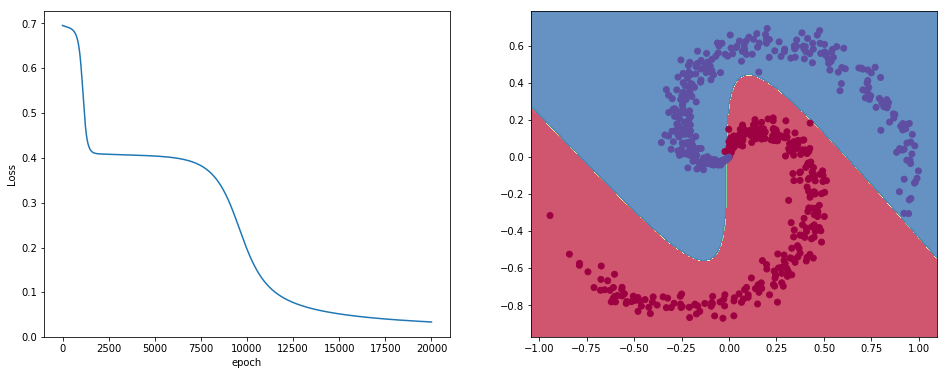

In [7]:
from scratchnet.plots import decision_boundary

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

axes[0].plot(history)
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('Loss')
decision_boundary(single_layer, X, y, ax=axes[1])